## Assignment problem statement

Take a trigonometric function and a choose an error function (N(0, sigma-sq)). Generate  data  set of 10,000 instances. Fit polynomials of order 1 - 10 and estimate and plot total error, Bias, Variance,   

training and validation error for each  using 10-fold cross validation.   Create the folds using Python function and compute all errors using the equations given in textbook.  Select the optimal model.

For the selected model, estimate and plot total error, Bias, Variance,    training and validation error for training set sizes  1K, 2K, ... 10K. Use 10-fold cross validation for each training set, and the functions coded earlier for estimating the error.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_dataset(num_instances, sigma, trig_func):
    dataset = []
    for _ in range(num_instances):
        angle = np.random.uniform(0, 2 * np.pi)  # Random angle between 0 and 2*pi
        error = np.random.normal(0, sigma)  # Random error from a normal distribution
        value = trig_func(angle) + error  # Compute the value with the user-defined trigonometric function and error
        dataset.append([angle, value])
    return dataset

num_instances = 10000
sigma = 0.2  # Adjust the value of sigma to control the spread of the errors

# Get the user's input for the trigonometric function
trig_func_input = input("Enter the trigonometric function (e.g., 'np.sin' for sine): ")
trig_func = eval(trig_func_input)  # Evaluate the user's input to obtain the function

dataset = generate_dataset(num_instances, sigma, trig_func)

# Create a DataFrame from the dataset
df = pd.DataFrame(dataset, columns=['x', 'y'])
df.head()

Enter the trigonometric function (e.g., 'np.sin' for sine): np.sin


,x,y
0,2.012659,0.972633
1,2.533167,0.535118
2,0.520148,-0.008531
3,1.878530,0.800062
4,1.205704,0.964221


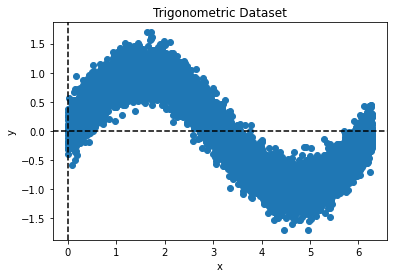

In [3]:
#plotting the dataset that we have created in above
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trigonometric Dataset')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axvline(x=0, color='black', linestyle='--')  # Add a vertical line at x=0
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [5]:
def calculate_values(dataset, train_indices, test_indices, degree):
    x_train = dataset[train_indices, 0]
    y_train = dataset[train_indices, 1]
    x_test = dataset[test_indices, 0]
    y_test = dataset[test_indices, 1]
    
    coefficients = np.polyfit(x_train, y_train, degree)
    y_train_pred = np.polyval(coefficients, x_train)
    y_test_pred = np.polyval(coefficients, x_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    bias = np.mean((y_test - np.mean(y_test_pred))**2)
    variance = np.var(y_test_pred)
    
    total_error = (bias+variance)
    
    return train_error, test_error, bias, variance, total_error

In [6]:
def fit_polynomial(dataset, degrees, cv_folds=10):
    kf = KFold(n_splits=cv_folds)
    total_errors = []
    biases = []
    variances = []
    train_errors = []
    test_errors = []
    
    for d in degrees:
        total_errors.append([])
        biases.append([])
        variances.append([])
        train_errors.append([])
        test_errors.append([])   
    
    for train_indices, test_indices in kf.split(dataset):
        for idx, degree in enumerate(degrees):
            
            train_error, test_error, bias, variance, total_error = calculate_values(dataset, train_indices, test_indices, degree)
            total_errors[idx].append(total_error)
            biases[idx].append(bias)
            variances[idx].append(variance)
            train_errors[idx].append(train_error)
            test_errors[idx].append(test_error)

    for idx in range(0, len(degrees)):
        total_errors[idx] = np.mean(total_errors[idx])
        biases[idx] = np.mean(biases[idx])
        variances[idx] = np.mean(variances[idx])
        train_errors[idx] = np.mean(train_errors[idx])
        test_errors[idx] = np.mean(test_errors[idx])
    return total_errors, biases, variances, train_errors, test_errors

In [7]:
degrees = range(1, 11)
total_errors, biases, variances, train_errors, test_errors = fit_polynomial(df.values, degrees)
# total_errors, biases, variances, train_errors, test_errors

In [8]:
from tabulate import tabulate
error_table = np.array([["Degree of Poly.", "Total Error", "Bias", "Variance", "Training Error", "Testing Error"]])
error_table = np.append(error_table,np.transpose([degrees, total_errors, biases, variances, train_errors, test_errors]))
error_table.shape =(11,6)
print(tabulate(error_table, headers="firstrow"))

  Degree of Poly.    Total Error      Bias    Variance    Training Error    Testing Error
-----------------  -------------  --------  ----------  ----------------  ---------------
                1       0.836852  0.537466    0.299386         0.238003         0.238185
                2       0.837011  0.537463    0.299548         0.237897         0.23815
                3       1.02872   0.537065    0.491657         0.0452909        0.0453296
                4       1.02875   0.537066    0.491685         0.0452631        0.0453055
                5       1.03268   0.537078    0.4956           0.0412936        0.0413529
                6       1.03269   0.537078    0.495613         0.0412912        0.0413593
                7       1.0327    0.537078    0.495622         0.0412845        0.04136
                8       1.0327    0.537078    0.495623         0.0412832        0.041372
                9       1.03271   0.537077    0.495636         0.0412827        0.0413786
               1

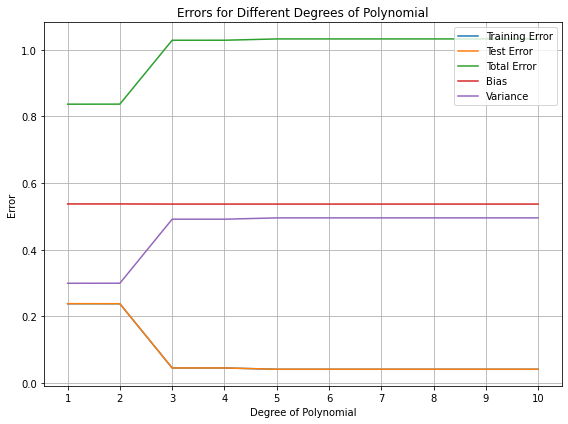

In [9]:
def plot_errors(degrees, total_errors, biases, variances, train_errors, test_errors):

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(degrees, train_errors, label='Training Error')
    ax.plot(degrees, test_errors, label='Test Error')
    ax.plot(degrees, total_errors, label='Total Error')
    ax.plot(degrees, biases, label='Bias')
    ax.plot(degrees, variances, label='Variance')
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('Error')
    ax.set_title('Errors for Different Degrees of Polynomial')
    ax.legend()
    ax.grid(True)
    plt.xticks(degrees)
    plt.tight_layout()
    plt.show()
    
plot_errors(degrees, total_errors, biases, variances, train_errors, test_errors)

In [10]:
optimal_degree_idx = np.argmin(test_errors)
optimal_degree = degrees[optimal_degree_idx]
print(optimal_degree)

5


In [11]:
training_set_sizes = np.arange(1000, 10001, 1000)
training_set_sizes

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])

In [12]:
def fit_optimal_polynomial(dataset, degree, sizes):
    total_errors = []
    biases = []
    variances = []
    train_errors = []
    test_errors = []
    
    for idx, size in enumerate(sizes):
        partial_dataset = np.array(dataset[:size])  # Convert the dataset to a numpy array
        total_error, bias, variance, train_error, test_error = fit_polynomial(partial_dataset, [degree])
        total_errors.append(total_error[0])
        biases.append(bias[0])
        variances.append(variance[0])
        train_errors.append(train_error[0])
        test_errors.append(test_error[0])
    return total_errors, biases, variances, train_errors, test_errors

In [13]:
total_errors, biases, variances, train_errors, test_errors = fit_optimal_polynomial(df, 
                                                                                    optimal_degree, 
                                                                                    training_set_sizes)
# total_errors, biases, variances, train_errors, test_errors


In [14]:
error_table = np.array([["Training Set Size", "Total Error", "Bias", "Variance", "Training Error", "Testing Error"]])
error_table = np.append(error_table,np.transpose([training_set_sizes, total_errors, biases, variances, train_errors, test_errors]))
error_table.shape =(11,6)
print(tabulate(error_table, headers="firstrow"))

  Training Set Size    Total Error      Bias    Variance    Training Error    Testing Error
-------------------  -------------  --------  ----------  ----------------  ---------------
               1000        1.06543  0.55251     0.512919         0.0394008        0.0398424
               2000        1.06731  0.553688    0.513622         0.039846         0.0401356
               3000        1.04941  0.545611    0.503795         0.0410733        0.0412446
               4000        1.03968  0.540459    0.499224         0.0412719        0.0413972
               5000        1.03231  0.536687    0.495627         0.0409468        0.0410513
               6000        1.03076  0.535961    0.494798         0.0411209        0.041191
               7000        1.03402  0.537579    0.496445         0.0410137        0.0410817
               8000        1.0398   0.540486    0.499318         0.0410332        0.0410996
               9000        1.04128  0.541211    0.500064         0.0410133       

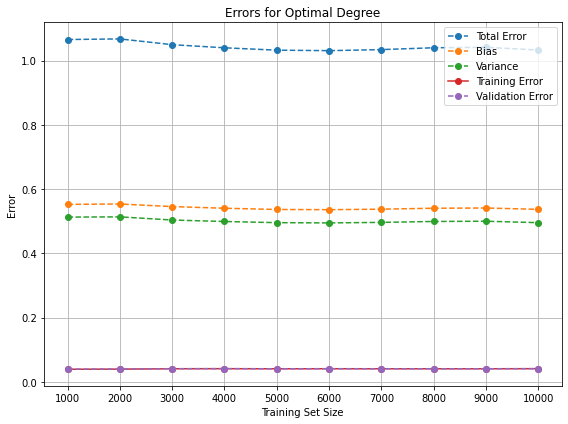

In [15]:
def plot_optimal_graph(sizes, total_errors, biases, variances, train_errors, test_errors):

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(training_set_sizes, total_errors, label='Total Error', linestyle='dashed', marker='o')
    ax.plot(training_set_sizes, biases, label='Bias', linestyle='dashed', marker='o')
    ax.plot(training_set_sizes, variances, label='Variance', linestyle='dashed', marker='o')
    ax.plot(training_set_sizes, train_errors, label='Training Error', linestyle='solid', marker='o')
    ax.plot(training_set_sizes, test_errors, label='Validation Error', linestyle='dashed', marker='o')
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Error')
    ax.set_title('Errors for Optimal Degree')
    ax.legend()
    ax.grid(True)
    plt.xticks(sizes)
    plt.tight_layout()
    plt.show()
    
plot_optimal_graph(training_set_sizes, total_errors, biases, variances, train_errors, test_errors)